In [21]:
import math
import json
import networkx as nx

## Calcuate distance

In [40]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

## Build city graph

In [41]:
def build_graph(path):
    threshold = 700
    graph = {}
    locations = {}

    with open(path, 'rb') as f:
        data = json.load(f)

    for city1 in data:
        locations[city1['name']] = city1['geoCoord']

        for city2 in data:
            if city1['name'] == city2['name']:
                continue

            dist = geo_distance(city1['geoCoord'], city2['geoCoord'])
            if dist < threshold:
                try:
                    graph[city1['name']].add(city2['name'])
                except KeyError:
                    graph[city1['name']] = set([city2['name']])

    return graph, locations

In [42]:
graph, locations = build_graph("../data/geo/cities.json")

In [43]:
graph

{'兰州': {'成都', '西宁', '西安', '银川'},
 '西宁': {'兰州', '成都', '银川'},
 '成都': {'兰州', '拉萨', '西宁', '西安', '贵阳', '重庆'},
 '石家庄': {'北京', '呼和浩特', '天津', '太原', '济南', '西安', '郑州'},
 '拉萨': {'南宁', '成都', '贵阳', '重庆'},
 '贵阳': {'南宁', '成都', '拉萨', '重庆', '长沙'},
 '武汉': {'上海', '南京', '南昌', '合肥', '杭州', '福州', '西安', '郑州', '长沙'},
 '郑州': {'北京', '南京', '合肥', '呼和浩特', '天津', '太原', '武汉', '济南', '石家庄', '西安'},
 '济南': {'北京', '南京', '合肥', '呼和浩特', '天津', '太原', '石家庄', '郑州'},
 '南京': {'上海', '南昌', '合肥', '杭州', '武汉', '济南', '福州', '郑州'},
 '合肥': {'上海', '南京', '南昌', '杭州', '武汉', '济南', '福州', '郑州', '长沙'},
 '杭州': {'上海', '南京', '南昌', '台湾', '合肥', '武汉', '福州'},
 '南昌': {'上海', '南京', '台湾', '合肥', '广州', '杭州', '武汉', '福州', '长沙'},
 '福州': {'上海', '南京', '南昌', '台湾', '合肥', '广州', '杭州', '武汉', '长沙', '香港'},
 '广州': {'南宁', '南昌', '海口', '澳门', '福州', '长沙', '香港'},
 '长沙': {'南昌', '合肥', '广州', '武汉', '澳门', '福州', '贵阳', '重庆', '香港'},
 '海口': {'南宁', '广州', '澳门', '香港'},
 '沈阳': {'北京', '哈尔滨', '天津', '长春'},
 '长春': {'哈尔滨', '沈阳'},
 '哈尔滨': {'沈阳', '长春'},
 '太原': {'北京', '呼和浩特', '天津', '济南', '石家庄', '西安',

In [44]:
locations

{'兰州': [103.73, 36.03],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [91.11, 29.97],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113, 28.21],
 '海口': [110.35, 20.02],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '台湾': [121.3, 25.03],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

In [48]:
# 乌鲁木齐 - 西宁
geo_distance(locations['西宁'], locations['乌鲁木齐'])

1435.7009342869312

## Draw city graph

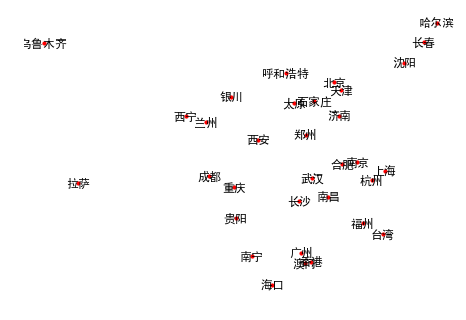

In [49]:
city_graph = nx.Graph()
city_graph.add_nodes_from(locations.keys())
nx.draw(city_graph, locations, with_labels=True, node_size=10)

## Draw city connection graph

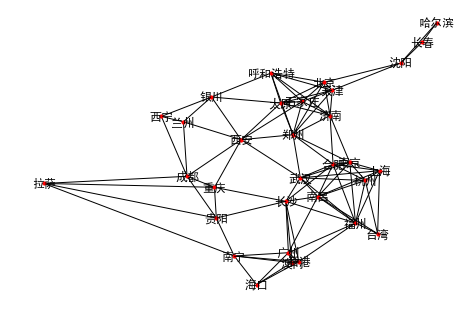

In [50]:
city_graph = nx.Graph(graph)
nx.draw(city_graph, locations, with_labels=True, node_size=10)